In [1]:
pip install regex

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
data = pd.read_csv('C:/Users/zaineb/Desktop/data/list_corporations.csv')
data.shape
data.columns
data

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4 Million,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5 Million,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,4996,https://www.inc.com/profile/village-plumbing-air,Village Plumbing & Air,villageplumbing.com,TX,15.8 Million,52.2377,Consumer Products & Services,88.0,62,1946,3,Houston,Houston
5008,4997,https://www.inc.com/profile/real-restoration-g...,Real Restoration Group,realrestoration.com,IL,11.6 Million,52.2127,Construction,380.0,220,2011,1,Chicago,Chicago
5009,4998,https://www.inc.com/profile/naval-systems,Naval Systems,n-s-i.us,MD,29.7 Million,52.2037,Government Services,187.0,127,2004,1,NaN,LEXINGTON PARK
5010,4999,https://www.inc.com/profile/hnm-systems,HNM Systems,hnmsystems.com,CA,8.8 Million,52.1919,Telecommunications,132.0,47,2011,1,San Diego,Solana Beach


C:\Users\zaineb\AppData\Local\Temp/ipykernel_84884/3095743403.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample['revenue'][x]= f(data_sample['revenue'][x])


                        name revenue                      industry
0                   Freestar    36.9       Advertising & Marketing
1                FreightWise    33.6    Logistics & Transportation
2          Cece's Veggie Co.    24.9               Food & Beverage
3                   LadyBoss    32.4  Consumer Products & Services
4                     Perpay    22.5                        Retail
...                      ...     ...                           ...
5007  Village Plumbing & Air    15.8  Consumer Products & Services
5008  Real Restoration Group    11.6                  Construction
5009           Naval Systems    29.7           Government Services
5010             HNM Systems     8.8            Telecommunications
5011                 Vivayic     4.5  Business Products & Services

[5012 rows x 3 columns]


C:\Users\zaineb\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


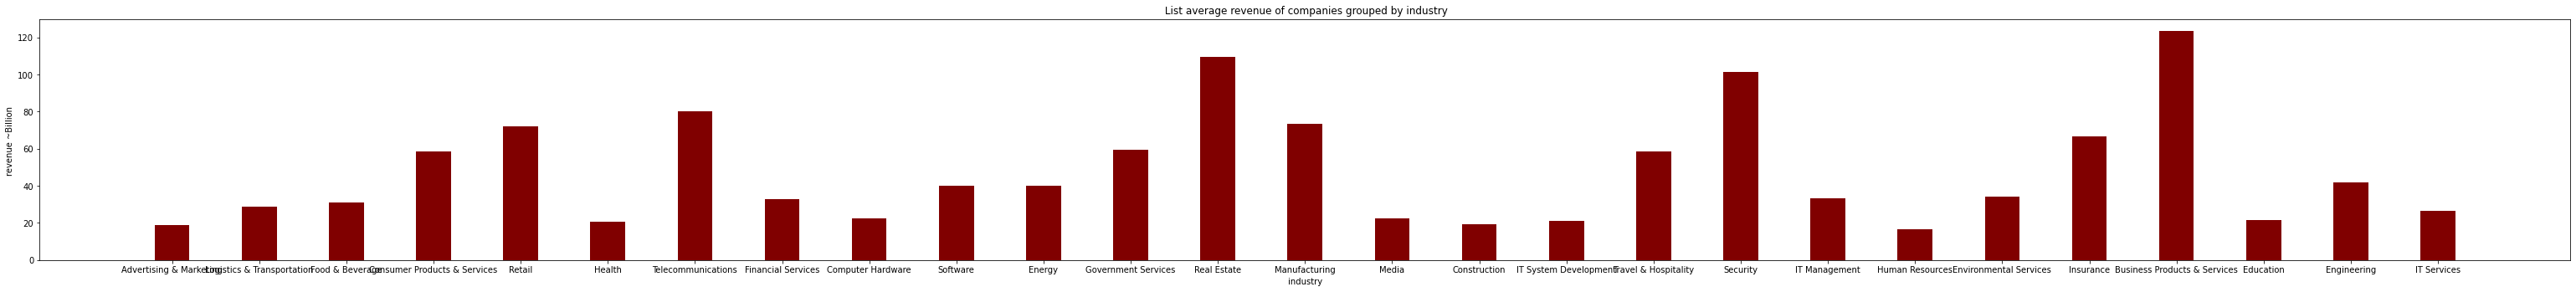

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import re
#1- List average revenue of companies grouped by industry
powers = {'Billion': 10 ** 3, 'Million': 10 ** 0}

def f(num_str):
   match = re.search(r"([0-9\.]+)\s?(Million|Billion)", num_str)
   if match is not None:
      quantity = match.group(1)
      magnitude = match.group(2)
      return float(quantity) * powers[magnitude]

data_sample = data[['name','revenue','industry']]
for x in data_sample.index:
    data_sample['revenue'][x]= f(data_sample['revenue'][x])
print(data_sample)
mean = data_sample.groupby(by=["industry"]).mean()
industry = data_sample["industry"].unique()

fig1 = plt.figure()
ax = fig1.add_axes([1,100,7,1])
revenue = mean["revenue"]

plt.bar(industry, revenue, color ='maroon',
        width = 0.4)
 
plt.xlabel("industry")
plt.ylabel("revenue ~Billion ")
plt.title(" List average revenue of companies grouped by industry")
plt.show()


Business Products & Services    492
Advertising & Marketing         489
Software                        461
Health                          356
Construction                    350
Consumer Products & Services    315
IT Management                   276
Financial Services              239
Government Services             236
Real Estate                     198
Logistics & Transportation      186
Manufacturing                   181
Retail                          163
Human Resources                 157
Food & Beverage                 127
IT System Development           120
Engineering                      81
Telecommunications               79
Energy                           78
Insurance                        70
Education                        70
Security                         67
Travel & Hospitality             57
Media                            46
Environmental Services           43
IT Services                      43
Computer Hardware                32
Name: industry, dtype: int64

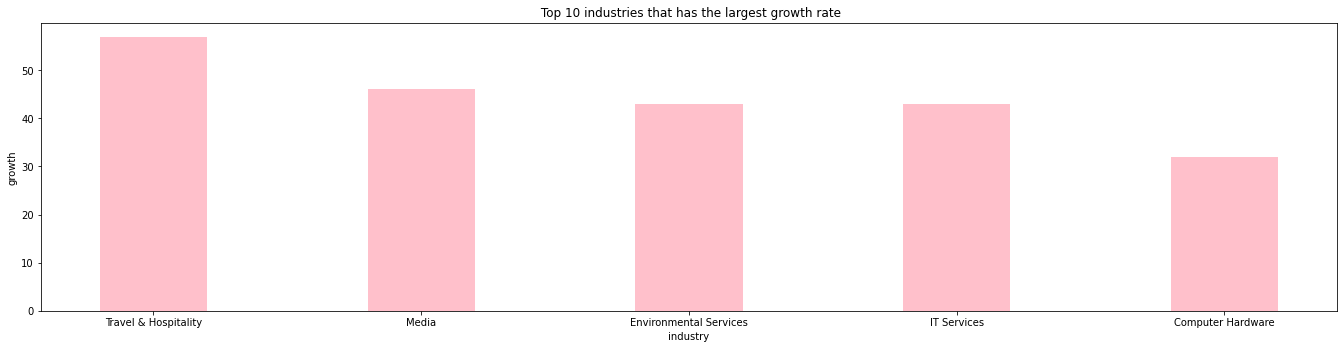

In [4]:
#2- List top 5 industries repsented in the list
data_sample = data[['industry']]
data_sample = data_sample["industry"].value_counts()
print(data_sample)
data_sample = data_sample.tail(5)
fig2 = plt.figure()
ax = fig2.add_axes([1,12,3,1])
counts= data_sample
industry = data_sample.index
plt.bar(industry,counts,color ='Pink',
        width = 0.4)
 
plt.xlabel("industry")
plt.ylabel("growth")
plt.title(" Top 10 industries that has the largest growth rate")
plt.show()

In [5]:
#3- Show mean revenue among industries
powers = {'Billion': 10 ** 3, 'Million': 10 ** 0}

def f(num_str):
   match = re.search(r"([0-9\.]+)\s?(Million|Billion)", num_str)
   if match is not None:
      quantity = match.group(1)
      magnitude = match.group(2)
      return float(quantity) * powers[magnitude]

data_sample = data[['name','revenue','industry']]
for x in data_sample.index:
    data_sample['revenue'][x]= f(data_sample['revenue'][x])
print(data_sample)
mean = data_sample['revenue'].mean()
print("mean revenue among industries is ", mean)

C:\Users\zaineb\AppData\Local\Temp/ipykernel_84884/3888876812.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sample['revenue'][x]= f(data_sample['revenue'][x])


                        name revenue                      industry
0                   Freestar    36.9       Advertising & Marketing
1                FreightWise    33.6    Logistics & Transportation
2          Cece's Veggie Co.    24.9               Food & Beverage
3                   LadyBoss    32.4  Consumer Products & Services
4                     Perpay    22.5                        Retail
...                      ...     ...                           ...
5007  Village Plumbing & Air    15.8  Consumer Products & Services
5008  Real Restoration Group    11.6                  Construction
5009           Naval Systems    29.7           Government Services
5010             HNM Systems     8.8            Telecommunications
5011                 Vivayic     4.5  Business Products & Services

[5012 rows x 3 columns]
mean revenue among industries is  47.47083000798084


                                growth_%
industry                                
Security                      490.193593
Telecommunications            515.411890
Software                      524.673761
Health                        546.911881
Retail                        584.823802
Energy                        592.075591
Computer Hardware             651.975244
Food & Beverage               668.225534
Consumer Products & Services  685.640300
Logistics & Transportation    717.563346


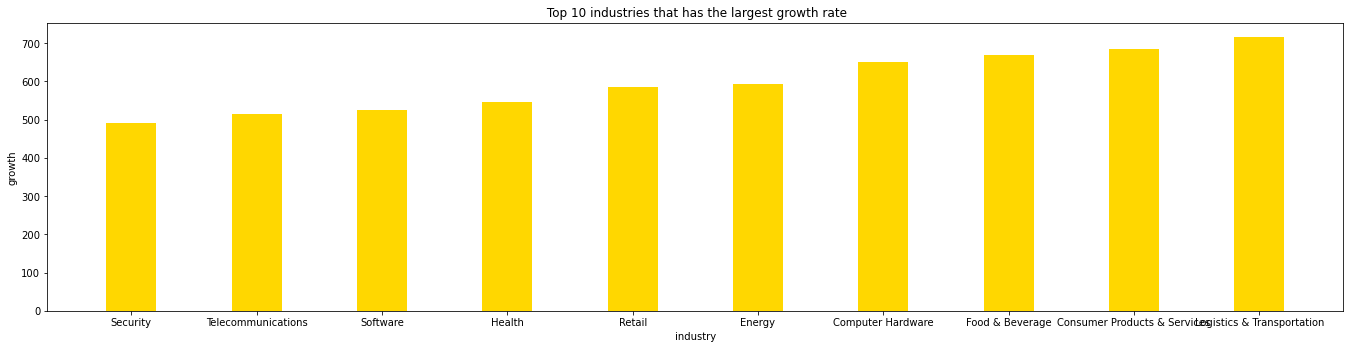

In [6]:
#4- Top 10 industries that has the largest growth rate
data_sample = data[['industry','growth_%']]
data_sample = data_sample.groupby(by=["industry"]).mean()
data_sample = data_sample.sort_values(by=['growth_%'])
data_sample = data_sample.tail(10)
print(data_sample)
fig4 = plt.figure()
ax = fig4.add_axes([1,12,3,1])
growth= data_sample["growth_%"]
industry = data_sample.index
plt.bar(industry,growth,color ='gold',
        width = 0.4)
 
plt.xlabel("industry")
plt.ylabel("growth")
plt.title(" Top 10 industries that has the largest growth rate")
plt.show()

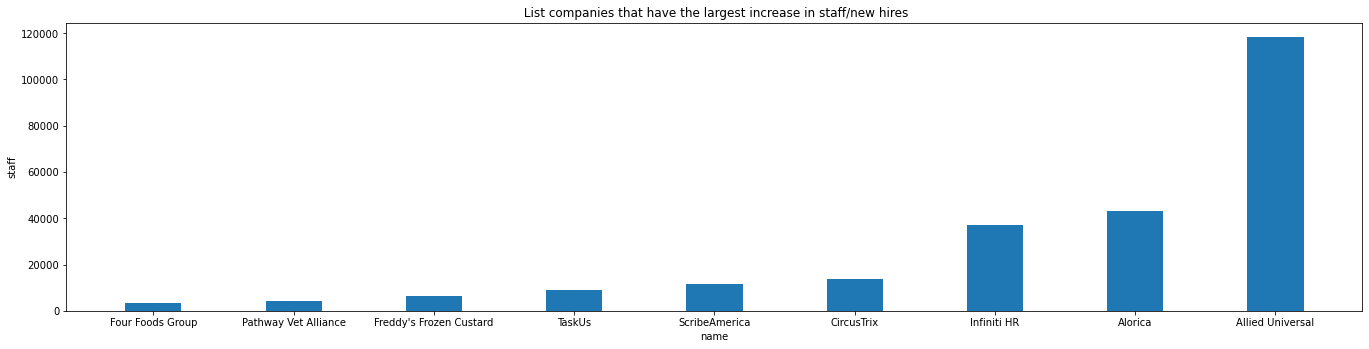

In [7]:
#5- List companies that have the largest increase in staff/new hires
data = pd.read_csv('C:/Users/zaineb/Desktop/data/list_corporations.csv')

data_sample = data[['name','workers','previous_workers']]

data_sample = data_sample.assign(Soustraire = data_sample['workers'] - data_sample['previous_workers'])
data_sample = data_sample.sort_values(by=['Soustraire'])
Soustraire = data_sample.tail(10)
fig5 = plt.figure()
ax = fig5.add_axes([1,12,3,1])
Soustr= Soustraire["Soustraire"]
name = Soustraire["name"]
plt.bar(name,Soustr,
        width = 0.4)
 
plt.xlabel("name")
plt.ylabel("staff")
plt.title(" List companies that have the largest increase in staff/new hires")
plt.show()

                        name  workers  previous_workers    growth_%  \
5011                 Vivayic     27.0                22     52.1691   
5010             HNM Systems    132.0                47     52.1919   
5009           Naval Systems    187.0               127     52.2037   
5008  Real Restoration Group    380.0               220     52.2127   
5007  Village Plumbing & Air     88.0                62     52.2377   
...                      ...      ...               ...         ...   
4                     Perpay     25.0                 6  18166.4070   
3                   LadyBoss     57.0                 2  21849.8925   
2          Cece's Veggie Co.    190.0                10  23880.4852   
1                FreightWise     39.0                 8  30547.9317   
0                   Freestar     40.0                 5  36680.3882   

      Soustraire  
5011         5.0  
5010        85.0  
5009        60.0  
5008       160.0  
5007        26.0  
...          ...  
4           19

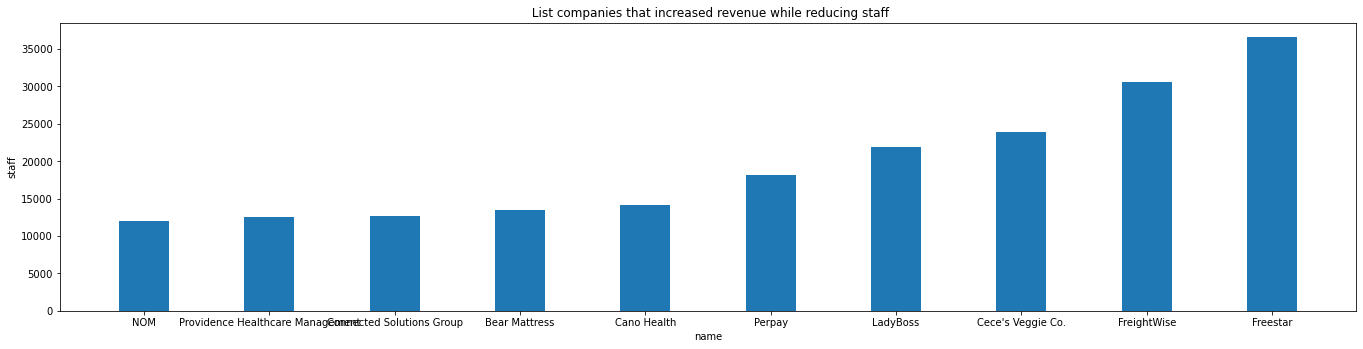

In [8]:
#6- List companies that increased revenue while reducing staff

data_sample = data[['name','workers','previous_workers', 'growth_%']]

data_sample = data_sample.assign(Soustraire = data_sample['workers'] - data_sample['previous_workers'])
data_sample = data_sample.sort_values(by=['growth_%','Soustraire'])
print(data_sample)
Soustraire = data_sample.tail(10)

fig6 = plt.figure()
ax = fig6.add_axes([1,12,3,1])
Soustr= Soustraire["growth_%"]
name = Soustraire["name"]
plt.bar(name,Soustr,
        width = 0.4)
 
plt.xlabel("name")
plt.ylabel("staff")
plt.title(" List companies that increased revenue while reducing staff")

plt.show()